In [113]:
import pandas as pd
import numpy as np


In [114]:
df=pd.read_csv("placement.csv")

In [115]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [116]:
df.shape

(100, 4)

In [117]:
df.iloc[:,1:]


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [118]:
import matplotlib.pyplot as plt

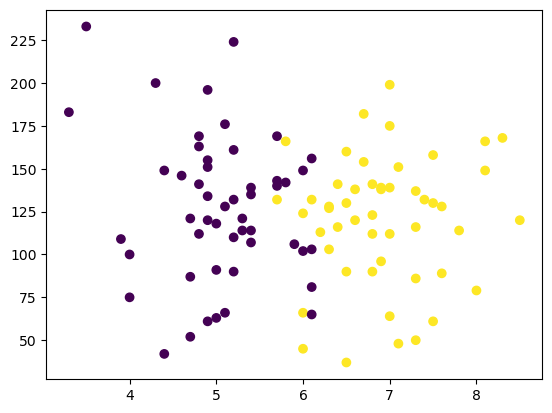

In [119]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

<h1>Extract Input and Output Columns</h1>

In [120]:
x=df.iloc[:,0:2]
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [121]:
y=df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

<H1>Train_test_split</H1>

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [124]:
x_train


,Unnamed: 0,cgpa
82,82,6.5
29,29,7.0
57,57,6.5
70,70,6.3
16,16,5.2
...,...,...
89,89,4.9
37,37,8.1
4,4,5.8
2,2,5.3


In [125]:
y_train

82    1
29    1
57    1
70    1
16    0
     ..
89    0
37    1
4     0
2     0
76    0
Name: placement, Length: 90, dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler=StandardScaler()


In [129]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 1.11445117,  0.42390469],
       [-0.69924111,  0.85744358],
       [ 0.25893594,  0.42390469],
       [ 0.70380386,  0.25048914],
       [-1.14410903, -0.70329642],
       [ 1.28555421, -0.26975753],
       [ 1.04600995, -0.96341975],
       [ 1.08023056, -0.52988086],
       [ 0.8749069 , -1.05012753],
       [ 1.18289238, -0.26975753],
       [ 0.39581838,  1.11756691],
       [ 1.66198091,  0.25048914],
       [ 0.05361229, -1.05012753],
       [ 1.14867178,  1.29098247],
       [-1.00722659,  0.51061247],
       [ 1.55931908, -1.48366642],
       [-0.90456476, -1.13683531],
       [ 0.29315655,  1.72452135],
       [-1.21255025,  0.07707358],
       [ 1.2513336 , -0.7900042 ],
       [-1.17832964, -0.7900042 ],
       [-0.04904954,  0.51061247],
       [ 0.36159777,  0.7707358 ],
       [-0.56235867, -0.0096342 ],
       [ 1.69620152,  0.16378136],
       [ 0.80646569, -0.96341975],
       [-1.28099146, -0.52988086],
       [ 0.43003899, -0.0096342 ],
       [ 0.19049472,

In [130]:
x_test=scaler.transform(x_test)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [132]:
x_test

array([[40. ,  4.9],
       [28. ,  5.2],
       [42. ,  7.6],
       [92. ,  5.2],
       [71. ,  6.1],
       [54. ,  6.4],
       [ 9. ,  5.1],
       [36. ,  5.7],
       [90. ,  7.3],
       [39. ,  4.6]])

<H1>Model Training</H1>

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
clf=LogisticRegression()

In [135]:
#  model training
clf.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<H1>Model Ealuation</H1>

In [138]:
y_prdict=clf.predict(x_test)
y_prdict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
y_test

40    0
28    0
42    1
92    0
71    1
54    1
9     0
36    0
90    1
39    0
Name: placement, dtype: int64

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy_score(y_test,y_prdict)

0.4

In [141]:
import pickle 

In [144]:
pickle.dump(clf,open('mode.pkl','wb'))